In [1]:
# Import pandas 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as plt
%matplotlib inline

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

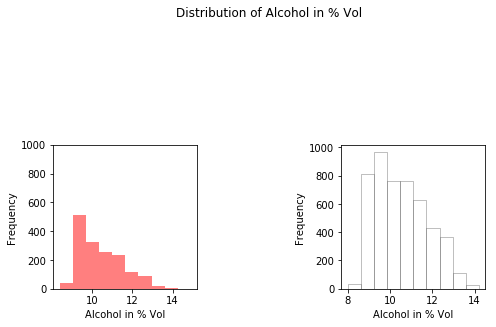

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

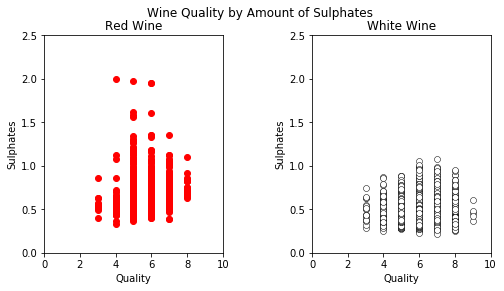

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

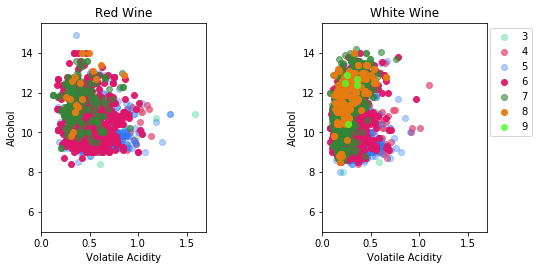

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [5]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [6]:
y = wines.quality
X = wines.drop(['quality', 'residual sugar', 'free sulfur dioxide', 'type'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=46, stratify=y)

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train_scaled = scaler.transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

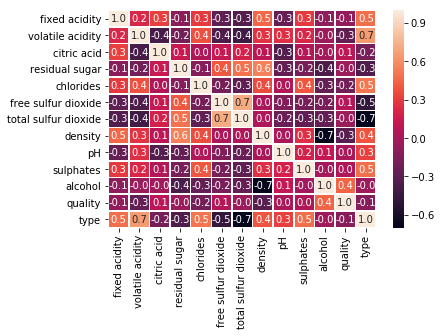

In [7]:
import seaborn as sns
corr_matrx = wines.corr()
sns.heatmap(corr_matrx, annot=True, linewidths=.5, fmt= '.1f')

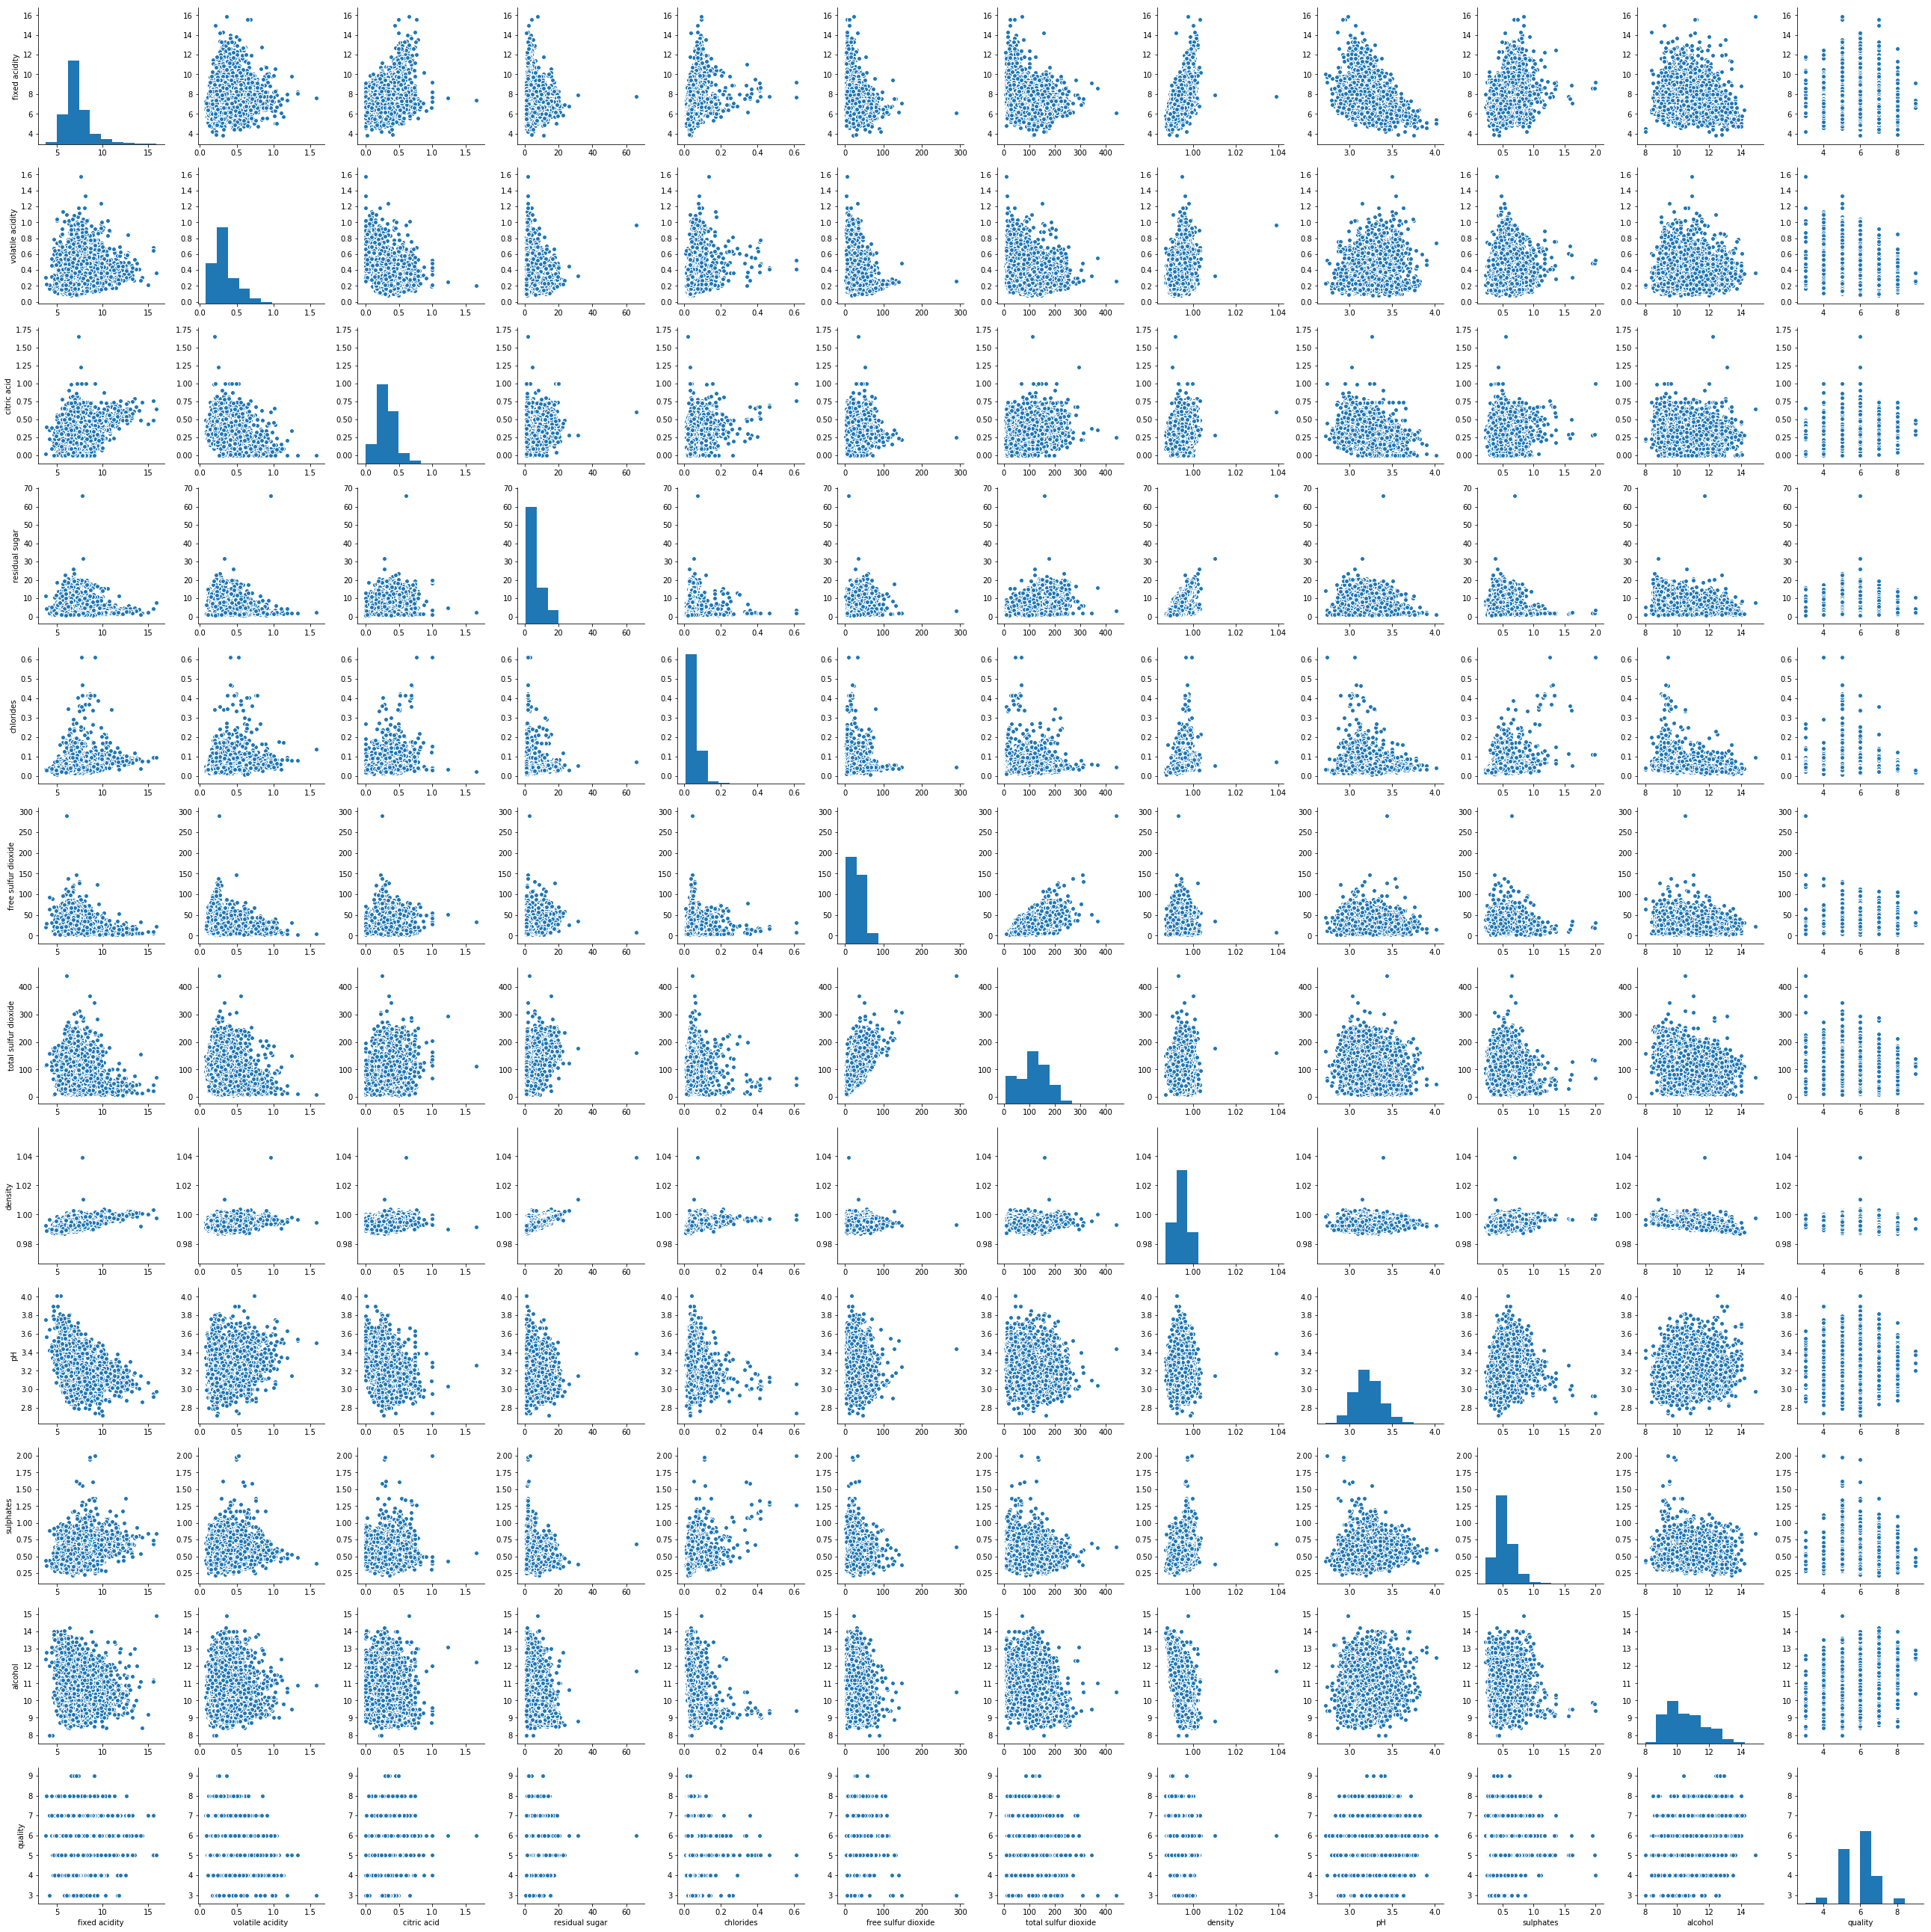

In [8]:
import seaborn as sb
column_list = list(wines.columns)[0:-1]
sb.pairplot(wines.loc[:,column_list], size=3)

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = regressor.predict(X_test_scaled)

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.562142397685
Mean Squared Error: 0.517182109322
Root Mean Squared Error: 0.71915374526


In [14]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.26829986808397494

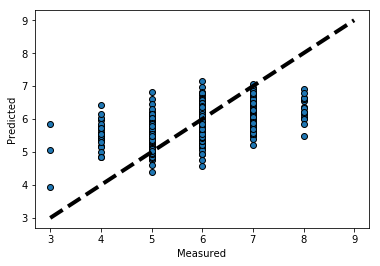

In [15]:
import matplotlib.pyplot as pyplt
#pyplt.scatter(y_pred, y_test,  color='black')

fig, ax = pyplt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
pyplt.show()

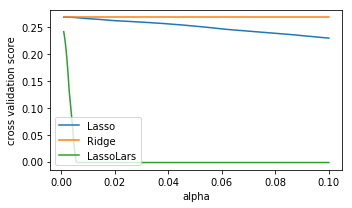

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LassoLars, LinearRegression
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge, LassoLars]:
    scores = [cross_val_score(Model(alpha), X_train_scaled, y_train, cv=10).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [17]:
ridger = Ridge(alpha=0.1, solver = 'sag')
ridger.fit(X_train_scaled, y_train) 
y_pred = ridger.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.562141271676
Mean Squared Error: 0.517216416531
Root Mean Squared Error: 0.719177597351


In [18]:
from sklearn import linear_model
lassy = linear_model.Lasso(alpha=0.001)
lassy.fit(X_train_scaled, y_train)
y_pred = lassy.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.562394334454
Mean Squared Error: 0.517122695838
Root Mean Squared Error: 0.719112436159


In [19]:
laslars = LassoLars(alpha=0.0001)
laslars.fit(X_train_scaled, y_train)
y_pred = laslars.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.564269378553
Mean Squared Error: 0.518224294965
Root Mean Squared Error: 0.719877972274


In [20]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.683311362829
Mean Squared Error: 0.754602869279
Root Mean Squared Error: 0.86867880674
